In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

#### Kernel

In [9]:
def squared_exponential_kernel(a, b, sigma=1, l=1):
    sqdist = np.subtract.outer(a, b)**2
    cov = sigma**2 * np.exp(-0.5 * sqdist / l**2)
    return cov.squeeze()

#### Posterior mean & co-variance function

In [10]:
def posterior(x_star, x, y):
    N = x.shape[0]
    N_star = x_star.shape[0]
    K = (squared_exponential_kernel(x, x)+1e-6*np.eye(N)).reshape(N, N)
    K_star = squared_exponential_kernel(x_star, x).reshape(N_star, N)
    K_star_star = squared_exponential_kernel(x_star, x_star).reshape(N_star, N_star)
    CK = np.linalg.inv(K).dot(K_star.T)
    mu_new = CK.T.dot(y)
    K_new = K_star_star - K_star.dot(CK) + 1e-6*np.eye(N_star)
    return mu_new.squeeze(), np.diag(K_new.squeeze())

In [11]:
N = 1000
x_star = np.linspace(0,1,N)

#### Real Objective Function
y = x^2 * sin(5 * PI * x)^6

In [12]:
def objective(x, noise=0):
    noise = np.random.normal(loc=0, scale=noise)
    return (x**2 * np.sin(5 * np.pi * x)**6.0) + noise

In [13]:
y_star = objective(x_star)
i = y_star.argmax(axis=0)
print(x_star[i],y_star[i])

0.9019019019019019 0.8112516409061398


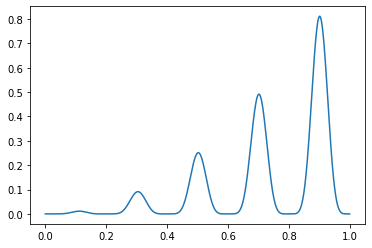

In [14]:
plt.plot(x_star, y_star);

#### random start

In [119]:
for itteration in range(10):
    if itteration == 0:
        x = np.random.choice(x_star,1)
        y = objective(x)
        print("random x & y :", x, "&", y)

    mu_star, sd_star = posterior(x_star, x, y)
    best = max(mu_star)
    acq = norm.cdf((mu_star - best) / (sd_star+1E-9))
    
    x_new = x_star[acq.argmax()]
    while x_new in x:
        x_new = np.random.choice(x_star,1)
    
    y_new = objective(x_new)
    #print("new x & y :", x_new, "&", y_new)
    x = np.append(x, x_new)
    y = np.append(y, y_new)
    print("best so far", x[y.argmax()], y[y.argmax()])
    

random x & y : [0.32032032] & [0.07518139]
best so far 0.3203203203203203 0.07518139224183958
best so far 0.3203203203203203 0.07518139224183958
best so far 0.3203203203203203 0.07518139224183958
best so far 0.3203203203203203 0.07518139224183958
best so far 0.3203203203203203 0.07518139224183958
best so far 0.4894894894894895 0.2207042863663563
best so far 0.4894894894894895 0.2207042863663563
best so far 0.4894894894894895 0.2207042863663563
best so far 0.49149149149149146 0.22892298436480923
best so far 0.5085085085085085 0.2450495104845268


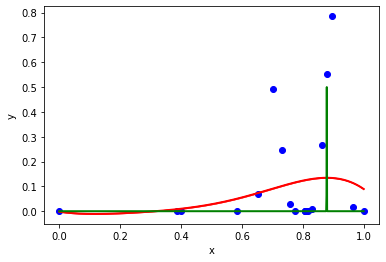

In [87]:
# plot mean and 2σ intervals
plt.plot(x_star, mu_star, 'r', lw=2, label="mean and 2σ region");
plt.plot(x_star, mu_star + 2*sd_star, 'r', lw=1);
plt.plot(x_star, mu_star - 2*sd_star, 'r', lw=1);
plt.fill_between(x_star.flatten(), mu_star - 2*sd_star, mu_star + 2*sd_star, color="r", alpha=0.5);
plt.plot(x_star, acq, 'g', lw=2, label="acquisition");
plt.scatter(x, y, color="blue");
plt.xlabel("x");
plt.ylabel("y");
plt.show();

In [40]:
x[y.argmax()], y[y.argmax()]

(0.9009009009009009, 0.8111349573617112)

In [59]:
gpr = GaussianProcessRegressor(kernel=kernels.RBF(), random_state=0).fit(x.reshape((-1,1)), y.reshape((-1,1)))

TypeError: __init__() got an unexpected keyword argument 'return_std'

In [69]:
gpr.predict(x_star.reshape((-1,1)), return_std=True)

(1000,)

In [16]:
x = np.random.choice(x_star,1)
y = objective(x)

In [97]:
np.random.choice(x_star,1).shape

(1,)

In [171]:
for itteration in range(10):
    if itteration == 0:
        x = np.random.choice(x_star,1)
        y = objective(x)
        print("random x & y :", x[0], "&", y[0])

    gpr = GaussianProcessRegressor(kernel=kernels.RBF(), random_state=0).fit(x.reshape((-1,1)), y.reshape((-1,1)))
    mu_star, sd_star = gpr.predict(x_star.reshape((-1,1)), return_std=True)
    mu_star = mu_star[:,0]
    best = max(mu_star)
    acq = norm.cdf((mu_star - best) / (sd_star+1E-9))
    
    x_new = x_star[acq.argmax()]
    while x_new in x:
        x_new = np.random.choice(x_star,1)
    
    y_new = objective(x_new)
    #print("new x & y :", x_new, "&", y_new)
    x = np.append(x, x_new)
    y = np.append(y, y_new)
    print("best so far", x[y.argmax()], y[y.argmax()])

random x & y : 0.7077077077077077 & 0.47925059571839607
best so far 0.7077077077077077 0.47925059571839607
best so far 0.7077077077077077 0.47925059571839607
best so far 0.7077077077077077 0.47925059571839607
best so far 0.7077077077077077 0.47925059571839607
best so far 0.8888888888888888 0.7207816289012945
best so far 0.8888888888888888 0.7207816289012945
best so far 0.8888888888888888 0.7207816289012945
best so far 0.8888888888888888 0.7207816289012945
best so far 0.8888888888888888 0.7207816289012945
best so far 0.8888888888888888 0.7207816289012945


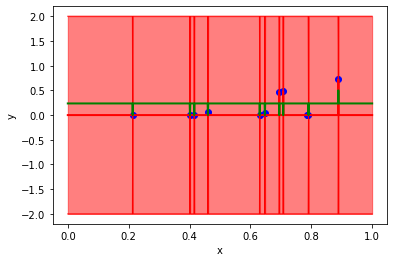

In [172]:
# plot mean and 2σ intervals
plt.plot(x_star, mu_star, 'r', lw=2, label="mean and 2σ region");
plt.plot(x_star, mu_star + 2*sd_star, 'r', lw=1);
plt.plot(x_star, mu_star - 2*sd_star, 'r', lw=1);
plt.fill_between(x_star.flatten(), mu_star - 2*sd_star, mu_star + 2*sd_star, color="r", alpha=0.5);
plt.plot(x_star, acq, 'g', lw=2, label="acquisition");
plt.scatter(x, y, color="blue");
plt.xlabel("x");
plt.ylabel("y");
plt.show();

In [173]:
x

array([0.70770771, 0.64764765, 0.69469469, 0.63063063, 0.79079079,
       0.88888889, 0.46046046, 0.4014014 , 0.21321321, 0.41541542,
       0.78578579])

In [174]:
m1, s1 = posterior(x_star, x,y)

In [196]:
gpr = GaussianProcessRegressor(kernel=kernels.RBF(1.0, (1e-3, 1e3)), random_state=0).fit(x.reshape((-1,1)), y.reshape((-1,1)))
m2, s2 = gpr.predict(x_star.reshape((-1,1)), return_std=True)
m2 = m2[:,0]


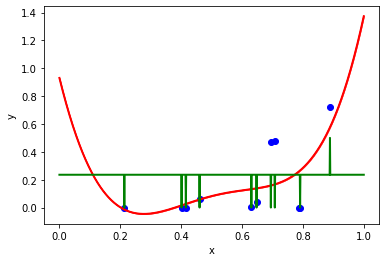

In [197]:
# plot mean and 2σ intervals
plt.plot(x_star, m1, 'r', lw=2, label="mean and 2σ region");
plt.plot(x_star, m1 + 2*s1, 'r', lw=1);
plt.plot(x_star, m1 - 2*s1, 'r', lw=1);
plt.fill_between(x_star.flatten(), m1 - 2*s1, m1 + 2*s1, color="r", alpha=0.5);
plt.plot(x_star, acq, 'g', lw=2, label="acquisition");
plt.scatter(x, y, color="blue");
plt.xlabel("x");
plt.ylabel("y");
plt.show();

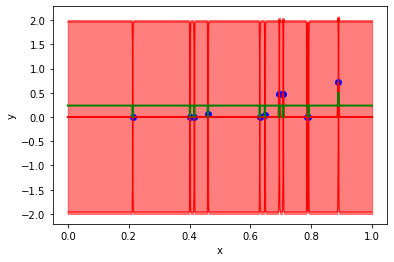

In [199]:
# plot mean and 2σ intervals
plt.plot(x_star, m2, 'r', lw=2, label="mean and 2σ region");
plt.plot(x_star, m2 + 1.96*s2, 'r', lw=1);
plt.plot(x_star, m2 - 1.96*s2, 'r', lw=1);
plt.fill_between(x_star.flatten(), m2 - 2*s2, m2 + 2*s2, color="r", alpha=0.5);
plt.plot(x_star, acq, 'g', lw=2, label="acquisition");
plt.scatter(x, y, color="blue");
plt.xlabel("x");
plt.ylabel("y");
plt.show();